# Getting data for machine learning model

In [1]:
import pandas as pd
import yfinance as yf
import os

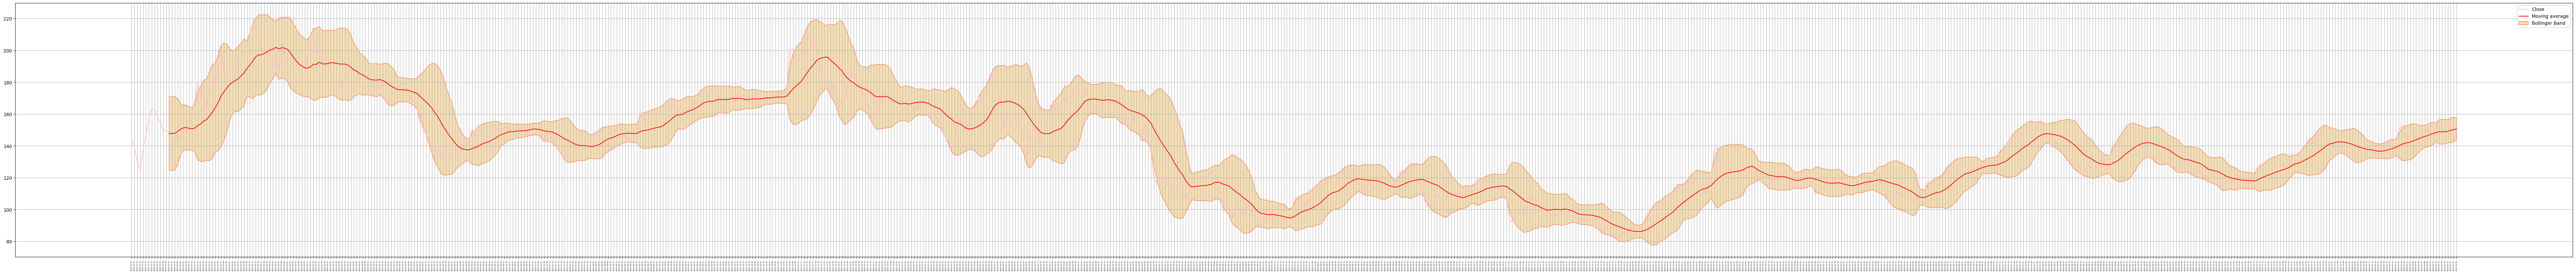

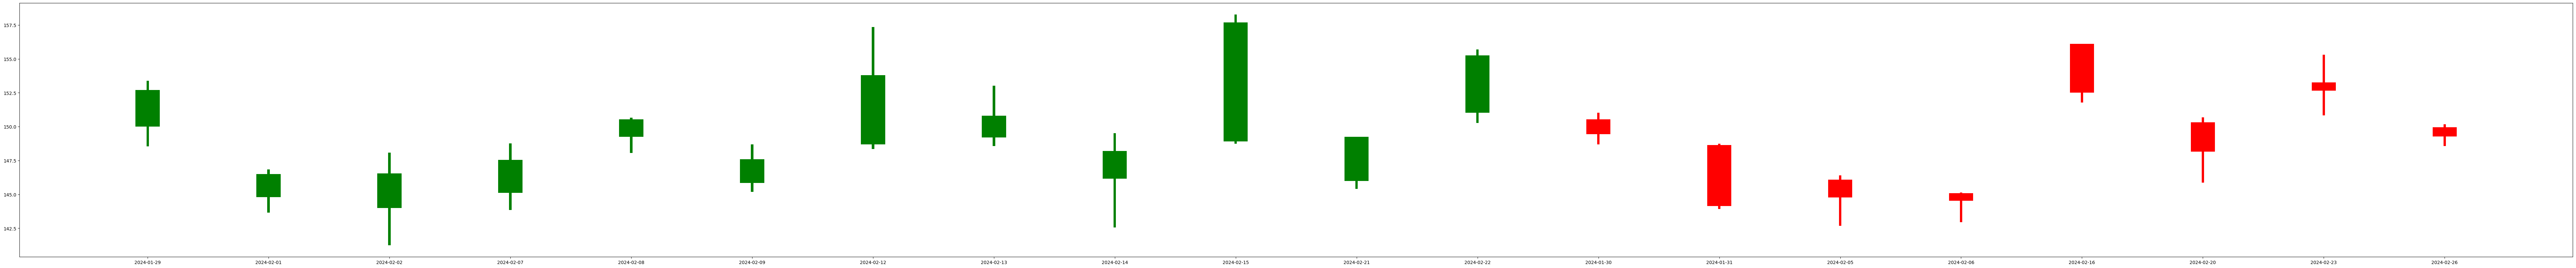

In [2]:
%run "Moving Average + Bollinger bands.ipynb"

In [2]:
all_companies = pd.read_csv("../Data/All Data/AmericanAndCanadianCompanies.csv")
# all_companies = all_companies[all_companies["Name"].str.contains("Common Stock")]

In [3]:
all_companies["Sector"] = all_companies["Sector"].fillna("Other")
necessary_data = all_companies[["Symbol", "Name", "Sector"]] 
necessary_data = all_companies[all_companies["Name"].str.contains("Common Stock")]
len(all_companies), len(necessary_data)

(5837, 4183)

In [4]:
necessary_data[:20]

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,A,Agilent Technologies Inc. Common Stock,$132.03,0.0100,0.01%,3.869003e+10,United States,1999.0,1877997,Industrials,Biotechnology: Laboratory Analytical Instruments
1,AA,Alcoa Corporation Common Stock,$26.52,-1.2300,-4.43%,4.761904e+09,United States,2016.0,5330348,Industrials,Aluminum
2,AACI,Armada Acquisition Corp. I Common Stock,$10.99,0.0000,0.00%,0.000000e+00,United States,2021.0,74,Finance,Blank Checks
4,AADI,Aadi Bioscience Inc. Common Stock,$1.90,0.0100,0.53%,4.659913e+07,United States,NaN,245345,Health Care,Biotechnology: Pharmaceutical Preparations
5,AAGR,African Agriculture Holdings Inc. Common Stock,$0.76,-0.0370,-4.63%,1.919422e+07,United States,2021.0,200168,Finance,Finance: Consumer Services
7,AAL,American Airlines Group Inc. Common Stock,$15.13,-0.1100,-0.72%,9.906471e+09,United States,NaN,22902785,Consumer Discretionary,Air Freight/Delivery Services
9,AAME,Atlantic American Corporation Common Stock,$2.70,0.0000,0.00%,5.508618e+07,United States,NaN,12675,Finance,Life Insurance
10,AAN,Aarons Holdings Company Inc. Common Stock,$10.54,0.3500,3.44%,3.196707e+08,United States,2020.0,236846,Miscellaneous,Diversified Commercial Services
11,AAOI,Applied Optoelectronics Inc. Common Stock,$14.15,-6.2000,-30.47%,5.028426e+08,United States,2013.0,19657486,Technology,Semiconductors
12,AAON,AAON Inc. Common Stock,$84.05,1.4000,1.69%,6.828630e+09,United States,NaN,226631,Industrials,Industrial Machinery/Components


In [3]:
def save_downloaded_data(df):
    row = necessary_data.loc[necessary_data["Symbol"] == df]
    str_test = row["Symbol"].astype(str)
    label = row["Symbol"].to_string(index = False)

    directory_name = row["Sector"].to_string(index = False)
    directory_path = f"../Data/{directory_name}"
    if not os.path.exists(directory_path):
        os.mkdir(directory_path)
    file_name = row["Name"].to_string(index = False)
    full_path = os.path.join(directory_path, file_name).replace('\\', "/")
    
    try:
        download_result = yf.download(label, period = 'max', auto_adjust = True)
        download_result = calculate_rsi(download_result, 14)
        download_result = calculate_bollinger_band(download_result, 14)
        download_result = calculate_ma(download_result, 28)
        download_result = calculate_atr(download_result, 14)
        download_result.to_csv(f'{full_path}.csv')
    except:
        print(f"{file_name} is skipped due to exception")

In [8]:
test = necessary_data["Symbol"][10:30].map(save_downloaded_data)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [7]:
# downloaded_data =  yf.download(necessary_data["Symbol"][:2], period = 'max')